In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
train_data = pd.read_csv(r"C:\Users\bond9\Downloads\archive (2)\Titanic-Dataset.csv")
test_data = pd.read_csv(r"C:\Users\bond9\Downloads\archive (2)\Titanic-Dataset.csv")

In [8]:
train_data.shape

(891, 12)

In [9]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

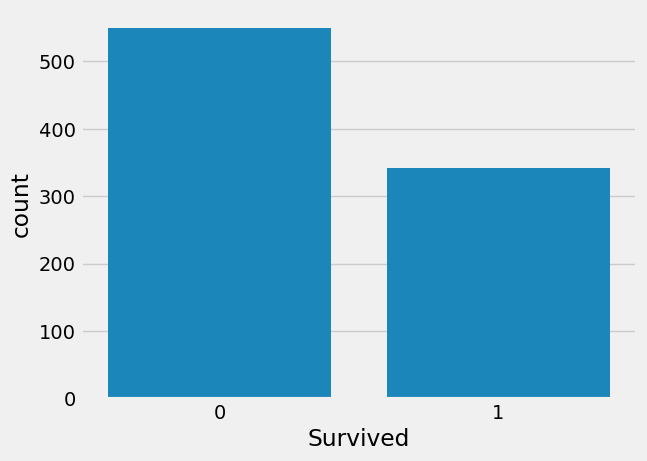

In [13]:
sb.countplot(x='Survived', data=train_data)  
plt.show()

In [14]:
train_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

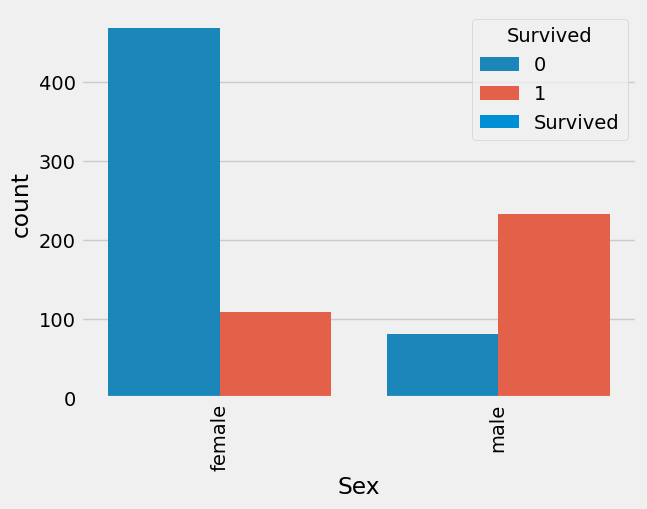

In [16]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

sb.countplot(x='Sex', hue='Survived', data=train_data)

plt.show()

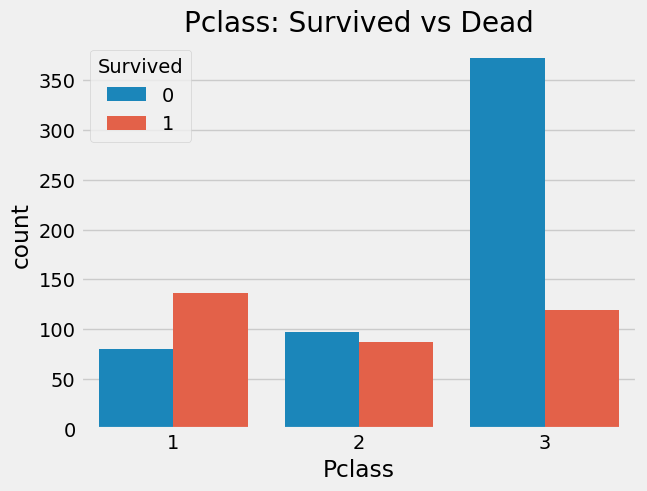

In [18]:
# Fix: Use x= to specify the column name explicitly
sb.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Pclass: Survived vs Dead')  # Also fixed typo in 'Survived'
plt.show()

In [19]:
pd.crosstab([train_data.Sex,train_data.Survived],train_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

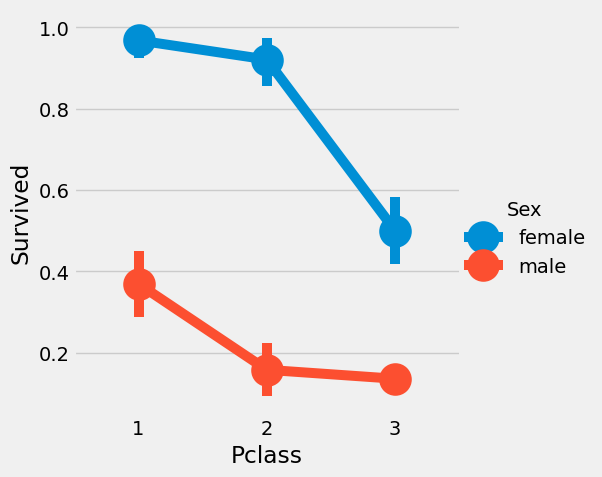

In [22]:
sb.catplot(x='Pclass', y='Survived', hue='Sex', data=train_data, kind='point')

# You can also try adding markers for better visibility
# sb.catplot(x='Pclass', y='Survived', hue='Sex', data=train_data, kind='point', markers=['o', 's'])

plt.show()

In [23]:
print('Oldest person Survived was of:',train_data['Age'].max())
print('Youngest person Survived was of:',train_data['Age'].min())
print('Average person Survived was of:',train_data['Age'].mean())

Oldest person Survived was of: 80.0
Youngest person Survived was of: 0.42
Average person Survived was of: 29.69911764705882


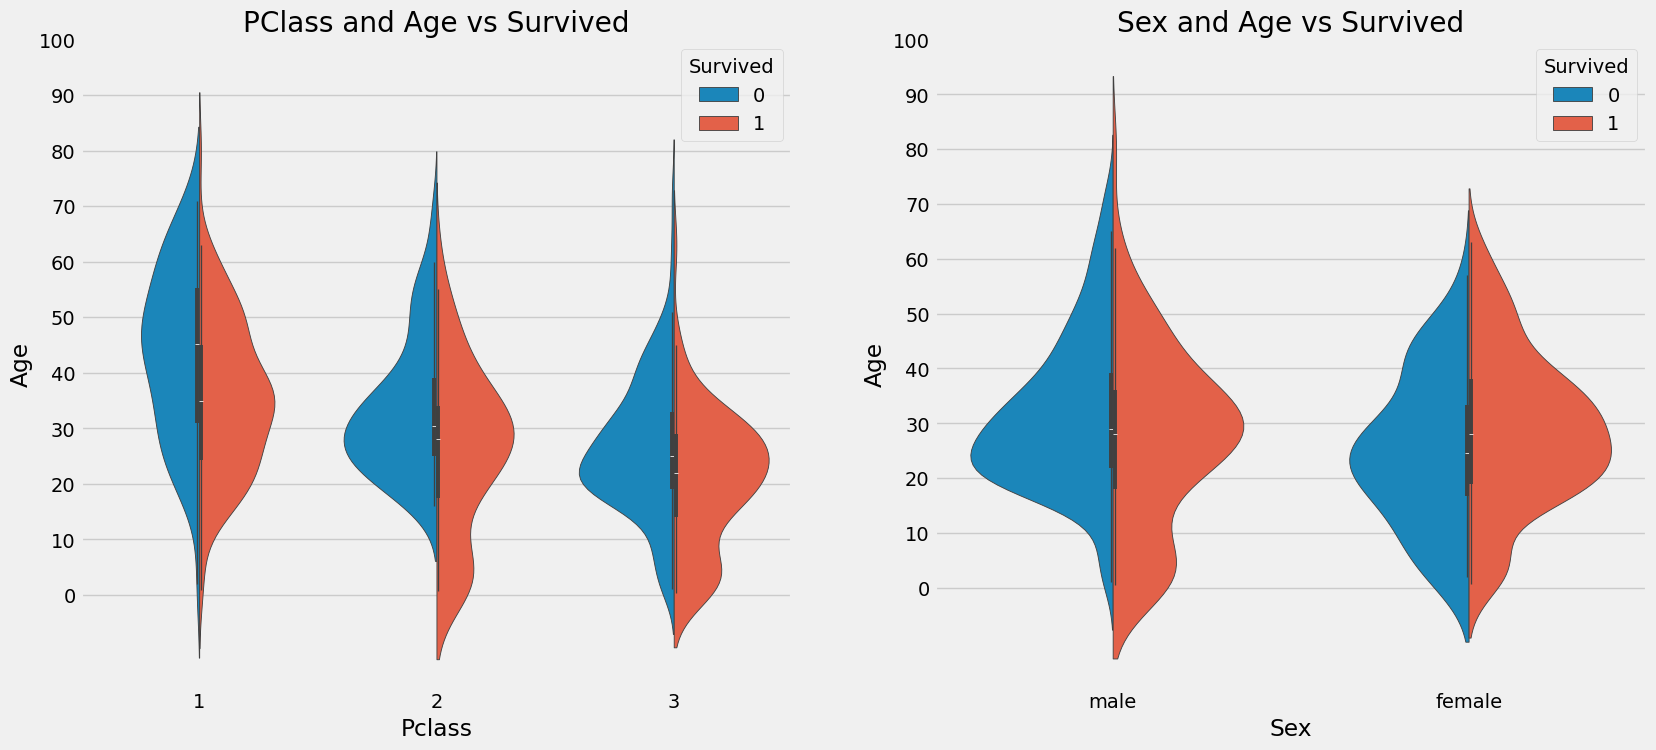

In [25]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Fixed violinplot calls by correctly specifying parameter names
sb.violinplot(x='Pclass', y='Age', hue='Survived', data=train_data, split=True, ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sb.violinplot(x="Sex", y="Age", hue="Survived", data=train_data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

In [26]:
train_data['Initial']=0
for i in train_data:
    train_data['Initial']=train_data.Name.str.extract('([A-Za-z]+)\.') #extracting Name initials

In [27]:
pd.crosstab(train_data.Initial,train_data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [28]:
train_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [29]:
train_data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [30]:
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Mrs'),'Age']=36
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Miss'),'Age']=22
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Other'),'Age']=46

In [31]:
train_data.Age.isnull().any()

False

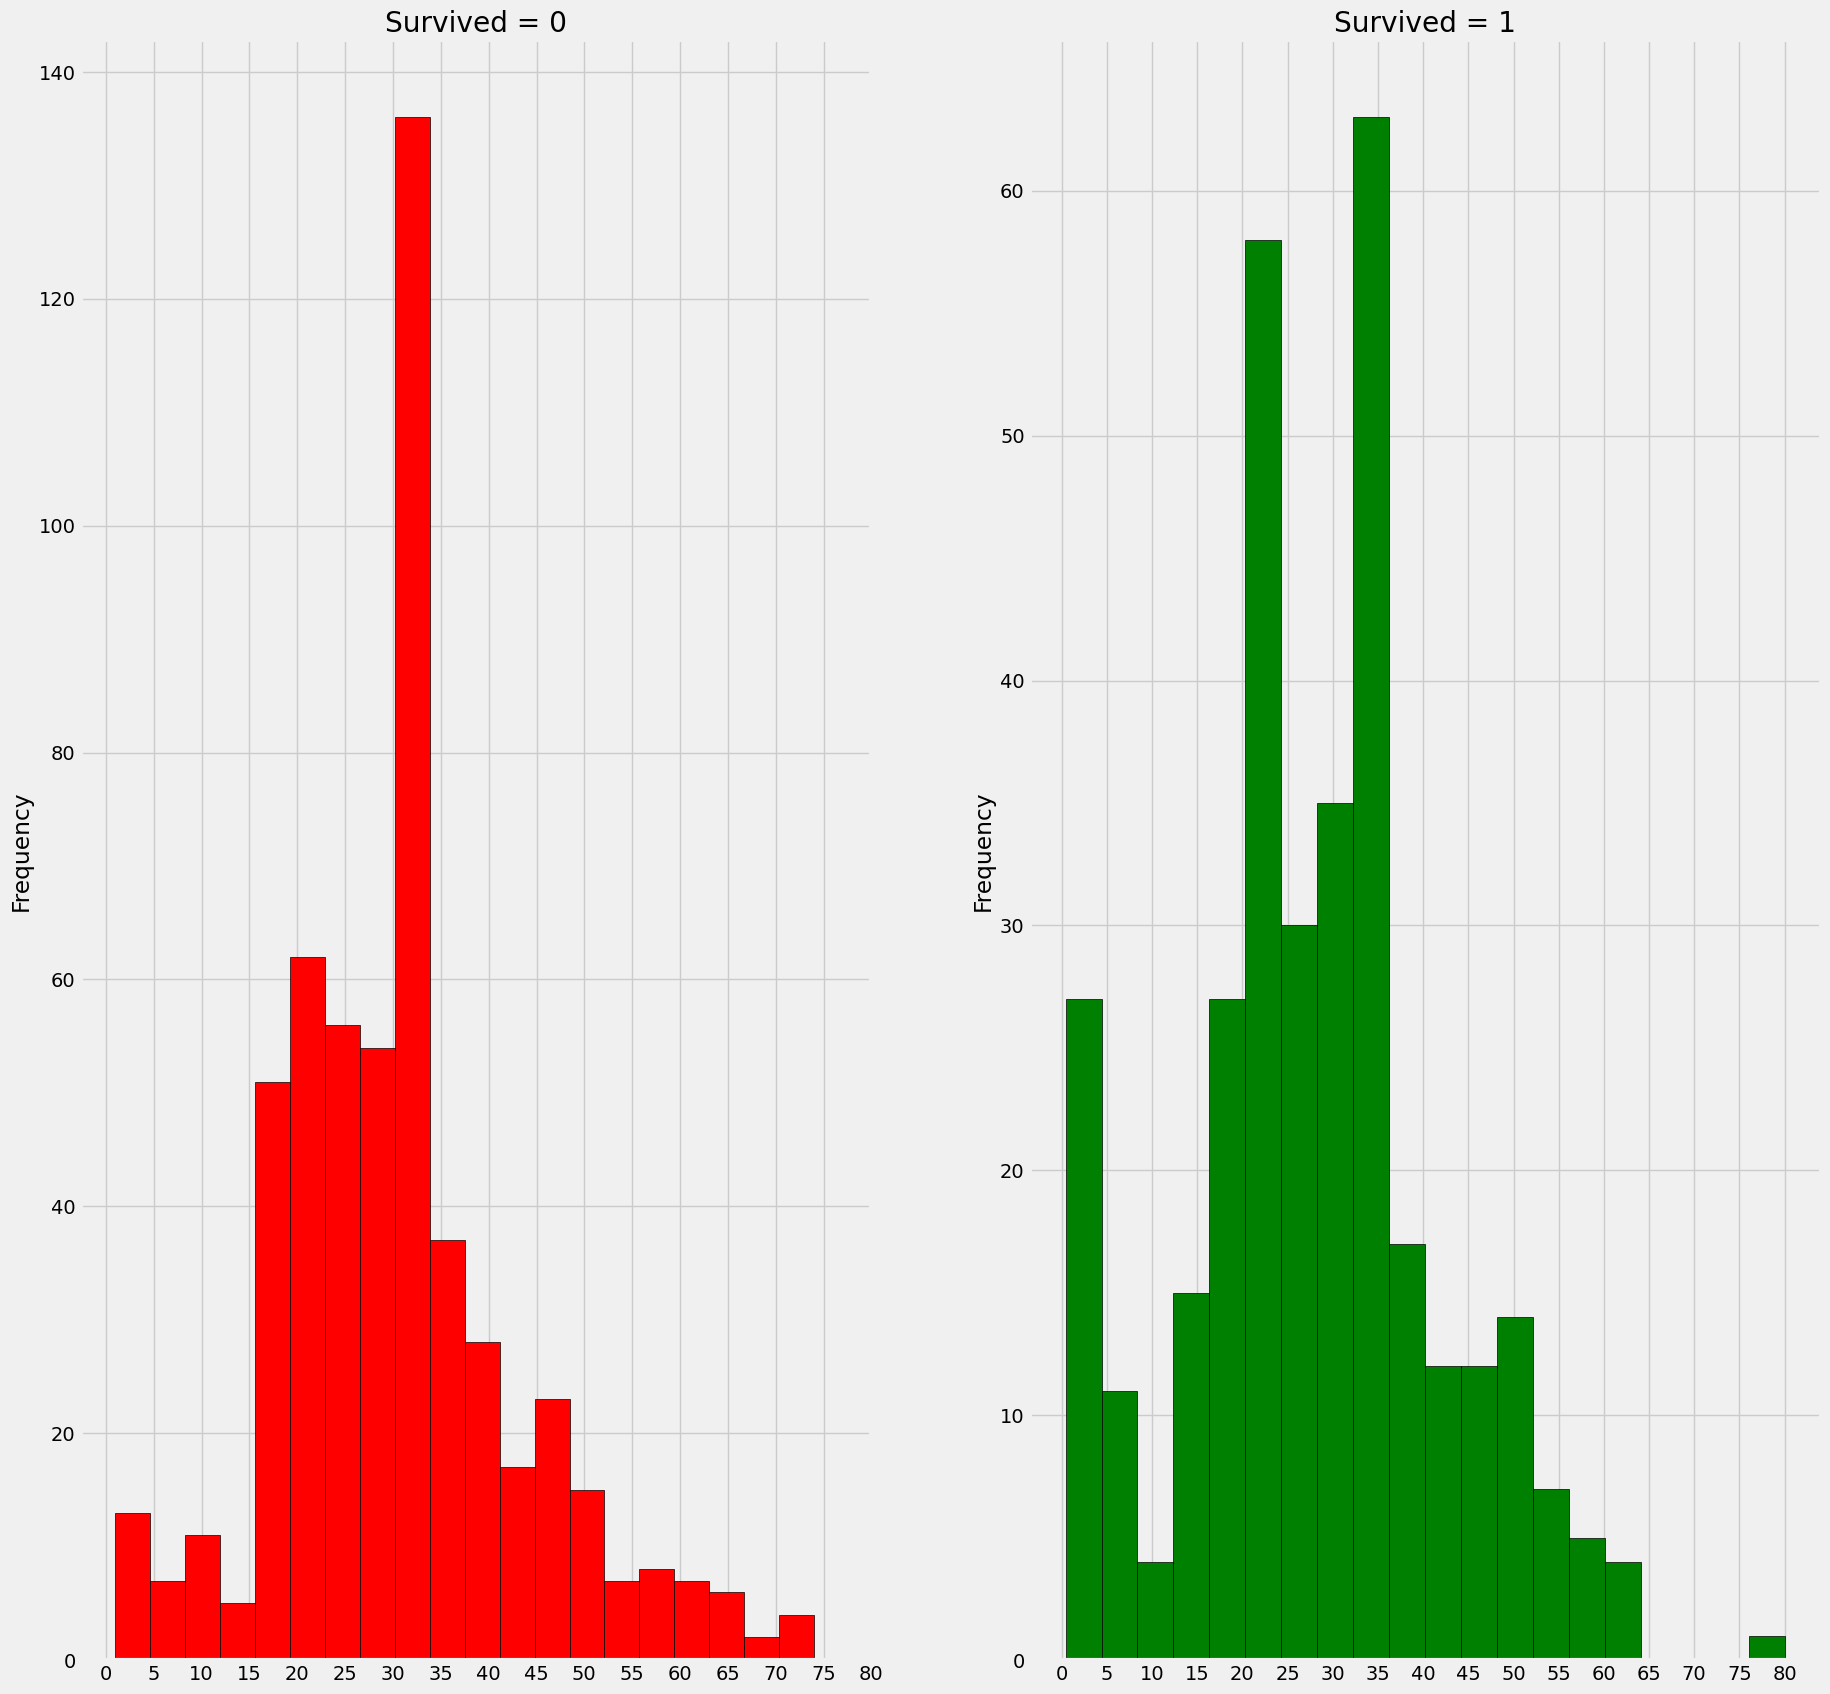

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,20))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived = 1')
plt.show()

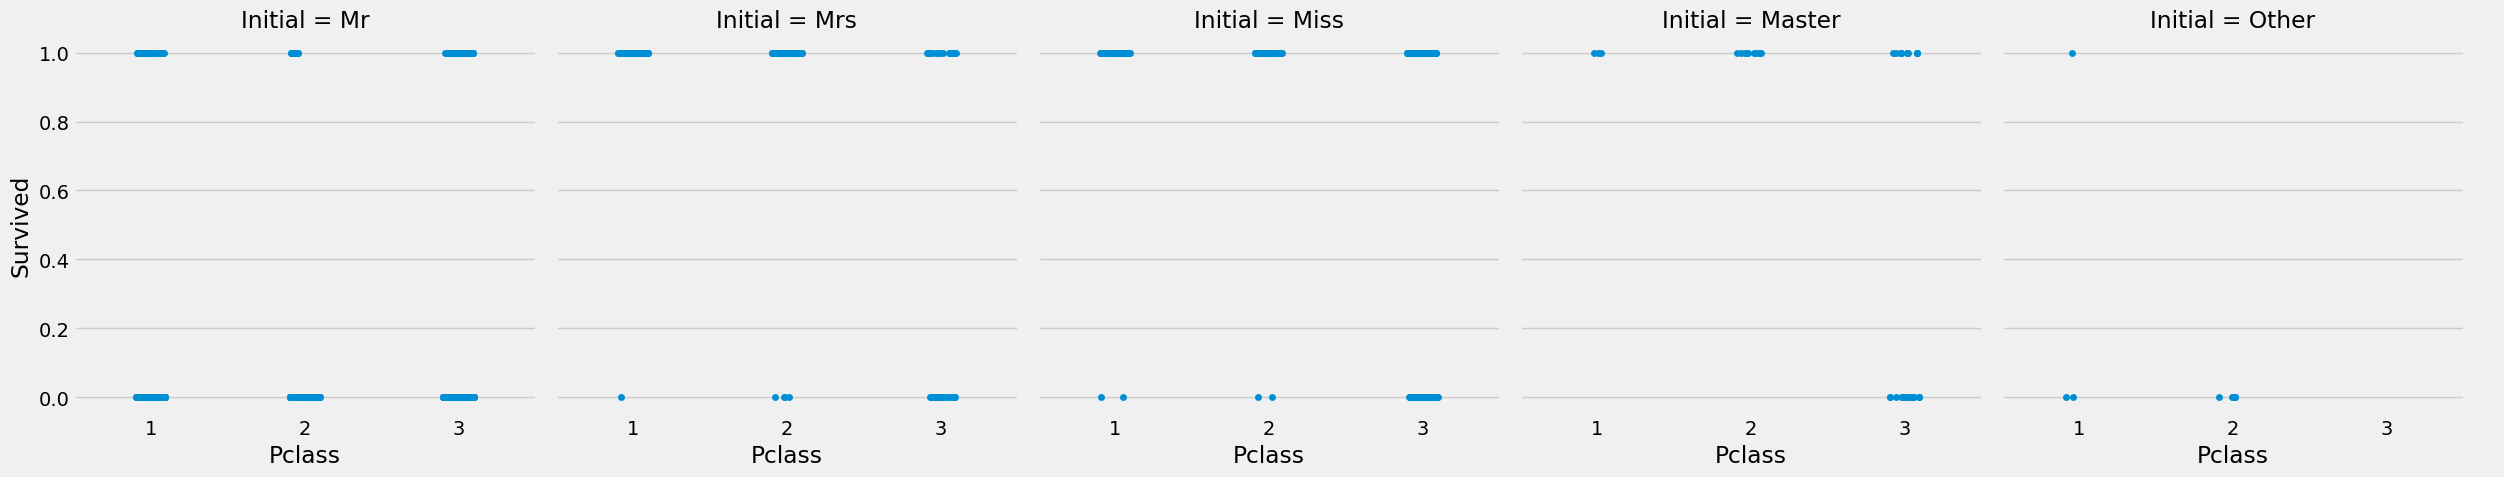

In [34]:
sb.catplot(x='Pclass', y='Survived', col='Initial', data=train_data)
plt.show()

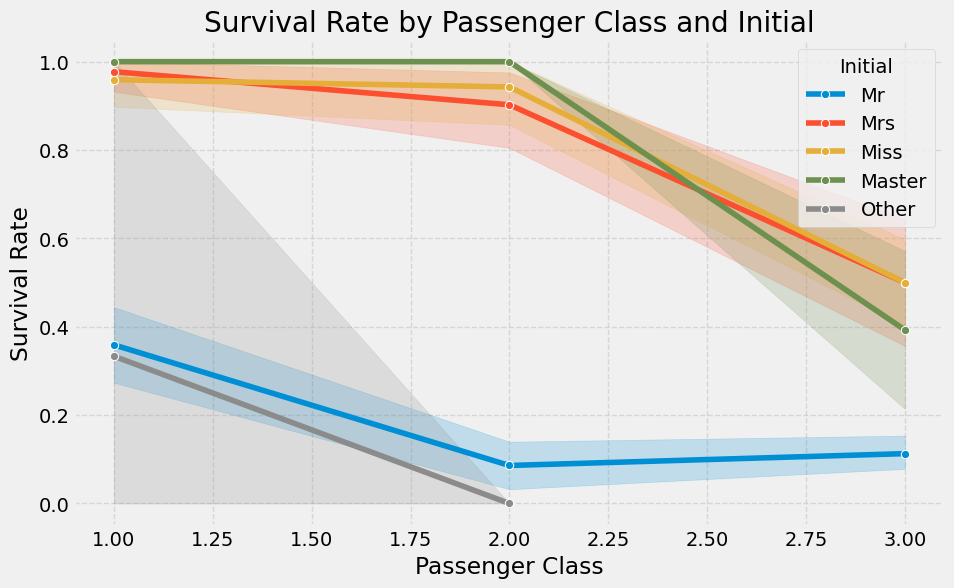

In [35]:
plt.figure(figsize=(10, 6))
for initial in train_data['Initial'].unique():
    subset = train_data[train_data['Initial'] == initial]
    sb.lineplot(x='Pclass', y='Survived', data=subset, marker='o', label=initial)

plt.title('Survival Rate by Passenger Class and Initial')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Initial')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [36]:
pd.crosstab([train_data.SibSp],train_data.Survived).style.background_gradient('summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


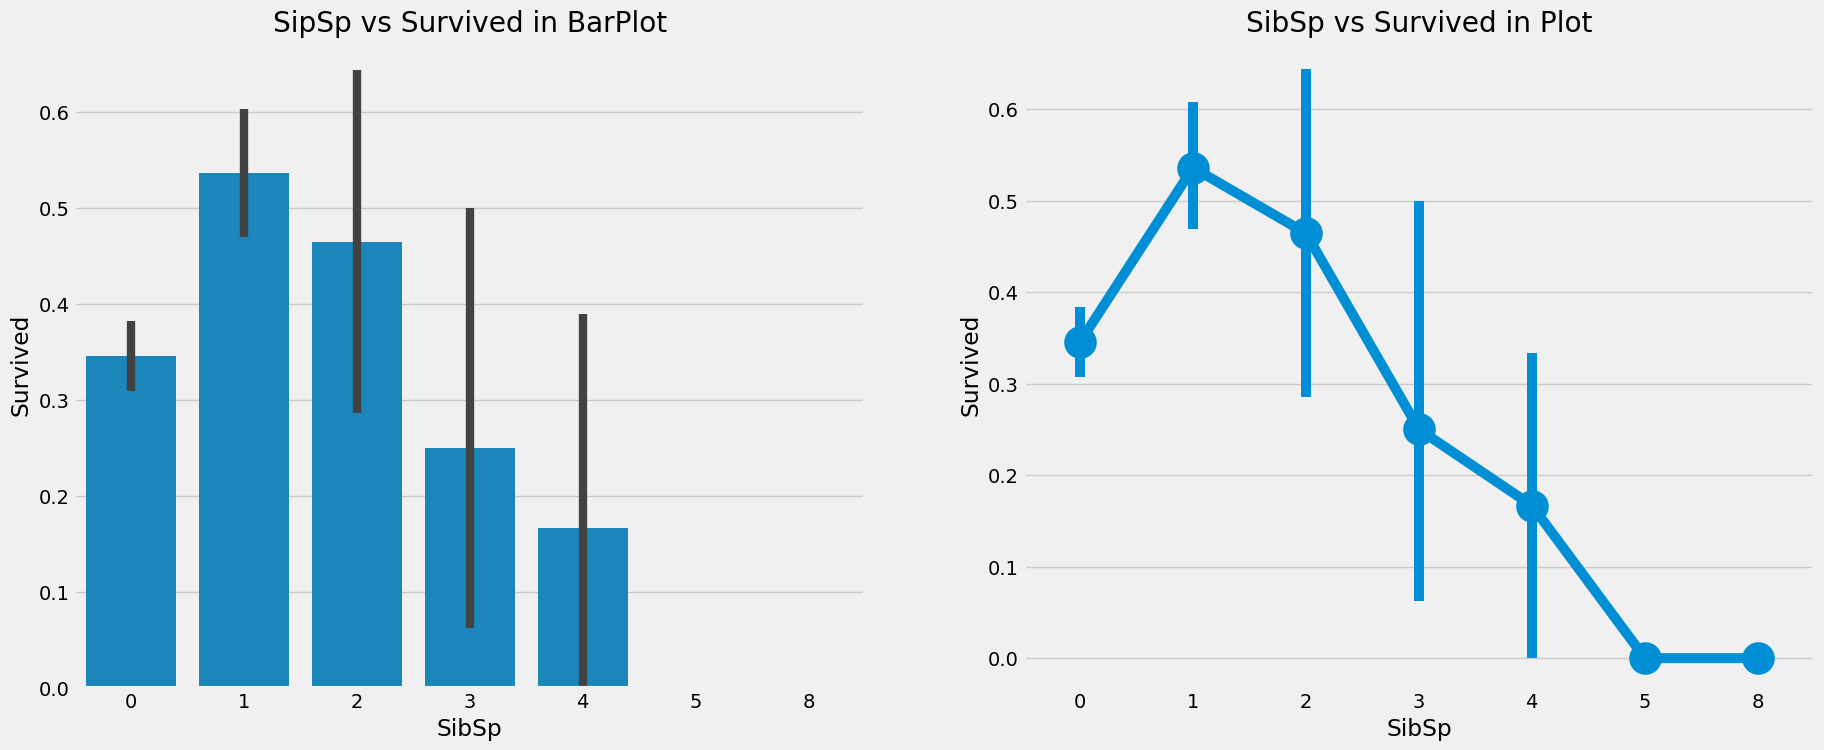

In [40]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Left graph - barplot
sb.barplot(x='SibSp', y='Survived', data=train_data, ax=ax[0])
ax[0].set_title('SipSp vs Survived in BarPlot')

# Right graph - pointplot (replacing the deprecated factorplot/catplot issue)
# Using pointplot directly on the axes instead of catplot which returns a FacetGrid
sb.pointplot(x='SibSp', y='Survived', data=train_data, ax=ax[1])
ax[1].set_title('SibSp vs Survived in Plot')

# Remove the plt.close(2) as it's not needed and might cause issues
plt.show()

In [41]:
pd.crosstab(train_data.SibSp,train_data.Pclass).style.background_gradient('summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


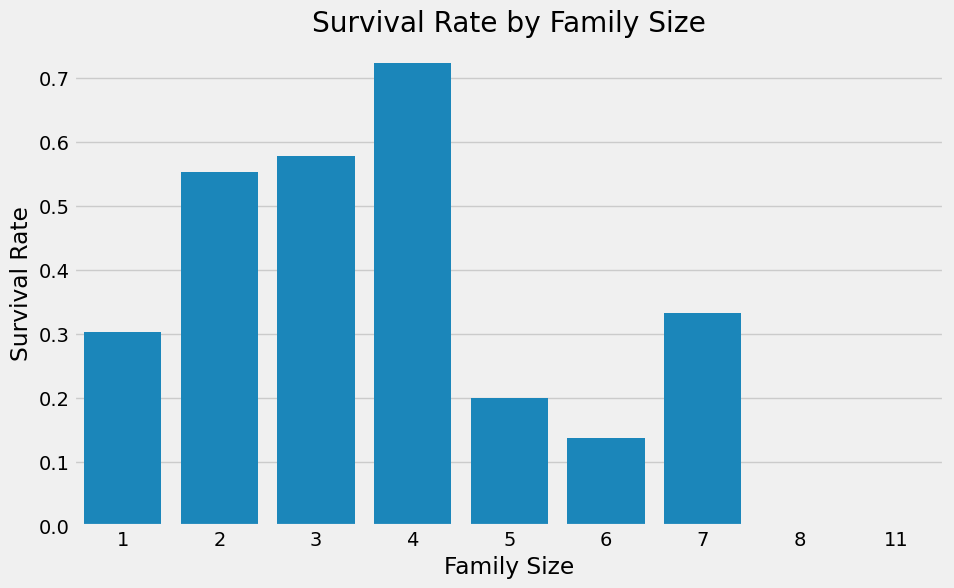

In [43]:
# Create a FamilySize feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Plot survival rate by FamilySize
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=train_data, ci=None)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.show()

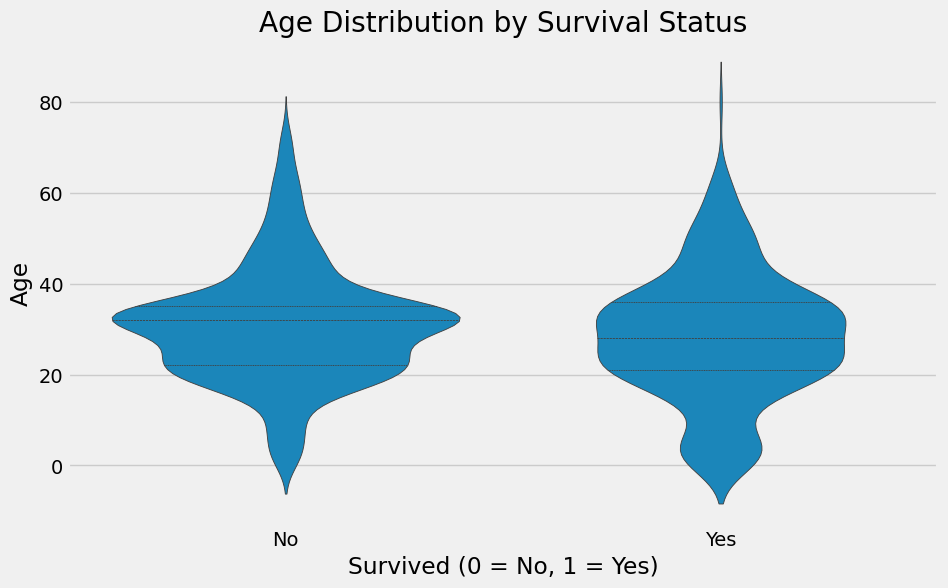

In [44]:
# Violin plot for Age and Survived
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=train_data, inner='quartile')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [45]:
# Create IsAlone feature
train_data['IsAlone'] = 0
train_data.loc[train_data['FamilySize'] == 1, 'IsAlone'] = 1

# Extract Title from Name
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# You can then check the value counts of the new 'Title' column
print(train_data['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


In [46]:
# --- Handling Missing Values ---
# Fill missing Age with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Fill missing Embarked with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column as it has too many missing values
train_data.drop('Cabin', axis=1, inplace=True)


# --- Encoding Categorical Variables ---
# Convert 'Sex' and 'Embarked' to numerical values
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)


# --- Drop Unnecessary Columns ---
# We can drop columns that we've already used or that are not useful
train_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


# --- Feature Scaling ---
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# We will scale 'Age' and 'Fare'
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])

print("Data preprocessing complete!")
train_data.head()

Data preprocessing complete!


,Survived,Pclass,Age,SibSp,Parch,Fare,Initial,FamilySize,IsAlone,Title,Sex_male,Embarked_Q,Embarked_S
0,0,3,-0.590771,1,0,-0.502445,Mr,2,0,Mr,True,False,True
1,1,1,0.614586,1,0,0.786845,Mrs,2,0,Mrs,False,False,False
2,1,3,-0.289432,0,0,-0.488854,Miss,1,1,Miss,False,False,True
3,1,1,0.388582,1,0,0.420730,Mrs,2,0,Mrs,False,False,True
4,0,3,0.388582,0,0,-0.486337,Mr,1,1,Mr,True,False,True


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# First, identify all categorical columns that need encoding
# Let's assume we need to check the data types in train_data
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns that need encoding: {categorical_columns}")

# Option 1: Drop all categorical columns if they're not important for your analysis
X = train_data.drop(['Survived', 'Title'] + categorical_columns, axis=1)

# Option 2: Encode categorical columns using OneHotEncoder
# Uncomment the following code if you want to use this approach
'''
# Create a copy of the dataframe to avoid modifying the original
X = train_data.drop(['Survived'], axis=1).copy()

# Apply one-hot encoding to categorical columns
for col in categorical_columns:
    # Create dummy variables
    dummies = pd.get_dummies(X[col], prefix=col, drop_first=True)
    # Add dummy variables to the dataframe
    X = pd.concat([X, dummies], axis=1)
    # Drop the original categorical column
    X = X.drop(col, axis=1)
'''

y = train_data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# --- Evaluate the Model ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Categorical columns that need encoding: ['Initial', 'Title']
Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
 [[91 14]
 [20 54]]
